<a href="https://colab.research.google.com/github/mlvlab/vision-tutorial/blob/master/07_Semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semantic Segmentation




### Reference
* [PyTorch Tutorial Semantic-Segmentation](https://www.learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/)
* [Blog: An overview of Semantic-segmentation](https://www.jeremyjordan.me/semantic-segmentation/)
* [CS231N Lecture11: Detection and Segmentation](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture11.pdf)
* [Fully Convolutional Networks paper](https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf)


<img src="http://drive.google.com/uc?export=view&id=1dTAPbCKJtwTW1DY6GxCcytCIDfzK_9Nc" width="50%" height="60%">

<img src="http://drive.google.com/uc?export=view&id=1exFBUkwh3SqO7w75WtByWGmDkScJs1Ts" width="80%" height="85%">

### GOALS
  Semantic Segmentation is an image analysis task in which we classify each pixel in the image into a class.

1. We will first download a pre-trained weight of segmentation.
2. Then, we will test the network with downloaded image files or your local images


### Import

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import models
from torchvision import transforms as T

### Download images

In [0]:
!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png 
!wget -nv https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg -O horse.png
!wget -nv https://user-images.githubusercontent.com/1592542/39029840-8f5989ee-444d-11e8-9071-52cb526824cf.jpg -O bicycle.jpg
!wget -nv https://images.pexels.com/photos/1485799/pexels-photo-1485799.jpeg -O person.png

2019-10-08 00:01:02 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]
2019-10-08 00:01:05 URL:https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg [6604923/6604923] -> "horse.png" [1]
2019-10-08 00:01:08 URL:https://user-images.githubusercontent.com/1592542/39029840-8f5989ee-444d-11e8-9071-52cb526824cf.jpg [105670/105670] -> "bicycle.jpg" [1]
2019-10-08 00:01:12 URL:https://images.pexels.com/photos/1485799/pexels-photo-1485799.jpeg [22870459/22870459] -> "person.png" [1]


In [0]:
bird = Image.open('bird.png')
horse = Image.open('horse.png')
bicycle = Image.open('bicycle.jpg')
person = Image.open('person.png')

### Pre-trained model

In [0]:
# FCN and DeepLabV3 (backbone: ResNet50, ResNet101)

fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()
deeplab = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

In [0]:
def preprocess_image(image, dev='cuda'):

  trf = T.Compose([T.Resize(640),
                   T.ToTensor(),
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])

  return trf(image).unsqueeze(0).to(dev)

In [0]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [0]:
def segment(net, image, dev='cuda'):  
  
  # Preprocessing
  inp = preprocess_image(image)
  
  # Pretrained model
  out = net.to(dev)(inp)['out']
  
  # max index for each pixel, which represents the class
  om = torch.argmax(out.squeeze(), dim=0).cpu().numpy()
  
  # Convert 2D image to an RGB image color
  rgb = decode_segmap(om)
  
  plt.imshow(rgb)
  plt.axis('off')
  plt.show()

### Inference

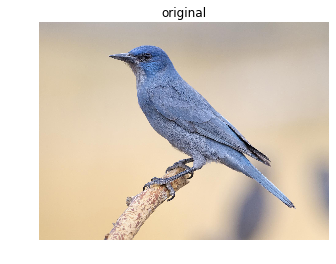

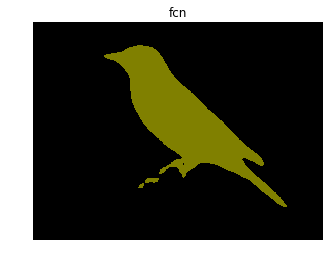

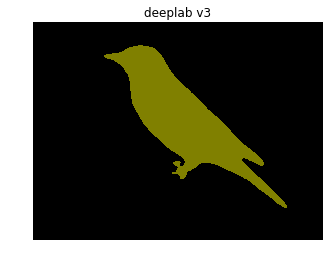

In [0]:
plt.title('original'); plt.imshow(bird); plt.axis('off'); plt.show()

plt.title('fcn')
segment(fcn, bird)

plt.title('deeplab v3')
segment(deeplab, bird)

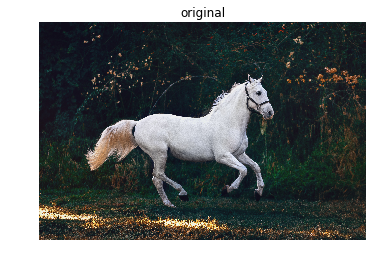

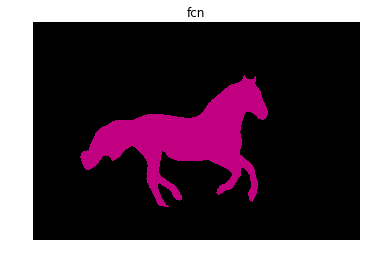

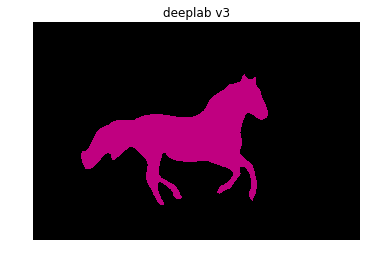

In [0]:
plt.title('original'); plt.imshow(horse); plt.axis('off'); plt.show()

plt.title('fcn')
segment(fcn, horse)

plt.title('deeplab v3')
segment(deeplab, horse)

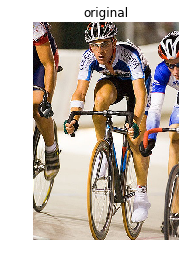

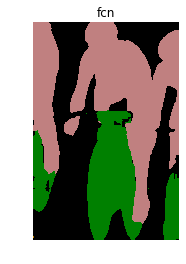

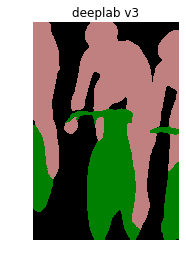

In [0]:
plt.title('original'); plt.imshow(bicycle); plt.axis('off'); plt.show()


plt.title('fcn')
segment(fcn, bicycle)

plt.title('deeplab v3')
segment(deeplab, bicycle)

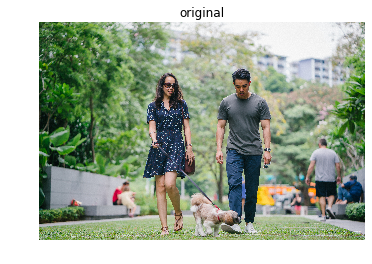

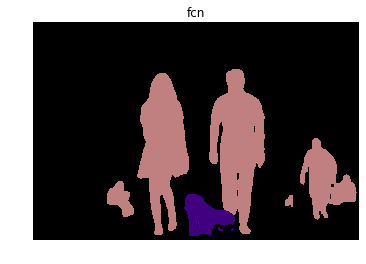

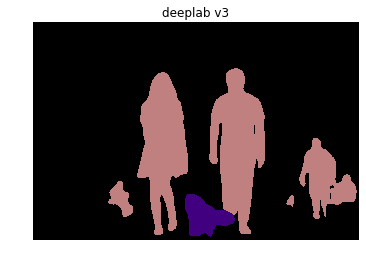

In [0]:
plt.title('original'); plt.imshow(person); plt.axis('off'); plt.show()

plt.title('fcn')
segment(fcn, person)

plt.title('deeplab v3')
segment(deeplab, person)

### Remove specific object

In [0]:
def reduce_object(image, target, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
    
  for l in range(nc):
    if l == target:
      continue
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [0]:
def segment_reduce_object(net, image, target, dev='cuda'):  
  
  # Preprocessing
  inp = preprocess_image(image)
  
  # Pretrained model
  out = net.to(dev)(inp)['out']
  
  # max index for each pixel, which represents the class
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  
  labels = {'background' : 0, 'aeroplane' : 1,'bicycle' : 2, 'bird' : 3, 
            'boat' : 4, 'bottle' : 5, 'bus' : 6, 'car' : 7,
            'cat' : 8, 'chair' : 9, 'cow' : 10, 'dining table' : 11,
            'dog' : 12, 'horse' : 13, 'motorbike' : 14, 'person' : 15,
            'potted plant' : 16, 'sheep' : 17, 'sofa' : 18, 'train' : 19, 'monitor' : 20}

  rgb = reduce_object(om, labels[target])
  
  plt.imshow(rgb)
  plt.axis('off')
  plt.show()

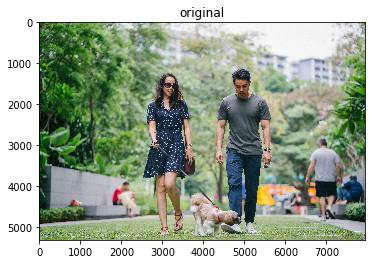

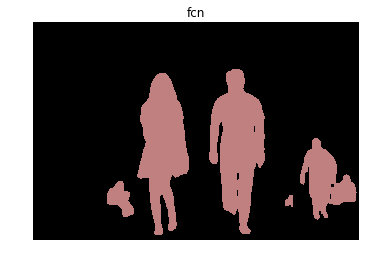

In [0]:
plt.title('original'); plt.imshow(person); plt.show()

plt.title('fcn')
segment_reduce_object(fcn, person, 'dog')

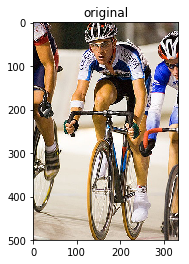

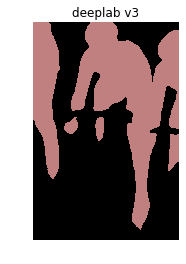

In [0]:
plt.title('original'); plt.imshow(bicycle); plt.show()

plt.title('deeplab v3')
segment_reduce_object(deeplab, bicycle, 'bicycle')

### FCN vs DeepLab v3


#### Time

In [0]:
bird = preprocess_image(bird)

In [0]:
import time
startTime = time.time()

for i in range(10):
  fcn.to('cuda')(bird)['out']

endTime = time.time() - startTime
print(endTime)

5.040599346160889


In [0]:
import time
startTime = time.time()

for i in range(10):
  deeplab.to('cuda')(bird)['out']

endTime = time.time() - startTime
print(endTime)

5.4539971351623535


#### Accuracy
- https://pytorch.org/blog/torchvision03/